In [26]:
#nbi:hide_in
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import sys
import numpy as np
from scipy import signal
import scipy.io.wavfile
from scipy.io import wavfile
from matplotlib import pyplot
import sklearn.decomposition
import wave

In [24]:
#nbi:hide_in
def getaudio(path):
    fs, data = wavfile.read(path)
    return fs, data

def get_seperated_audio(audio):
    audio1 = getaudio('wav_numbers_trim/%s_numbers.wav'%(audio[0].lower()))
    audio2 = getaudio('wav_numbers_trim/%s_numbers.wav'%(audio[1].lower()))
    
    t1 = audio1[1][:,0]
    t2 = audio2[1][:,0]

    t1 = (t1)/ 2**15
    t2 = (t2)/ 2**15
    
    source1 = 0.3*t1 + 0.7*t2
    source2 = 0.7*t1 + 0.3*t2
    
    data = np.c_[source1, source2]

    fast_ica  = sklearn.decomposition.FastICA( n_components=2  )
    separated = fast_ica.fit_transform( data )
    
    assert np.allclose( data, separated.dot( fast_ica.mixing_.T ) + fast_ica.mean_ )

    max_source, min_source = 1.0, -1.0
    max_result, min_result = max(separated.flatten()), min(separated.flatten())
    
    separated = 2*((separated - np.ones(separated.shape)*min_result)/(max_result - min_result)) + np.ones(separated.shape)*(-1)
    
    fig = pyplot.figure( figsize=(10, 8) )
    fig.canvas.set_window_title( 'Blind Source Separation' )

    ax = fig.add_subplot(221)
    ax.set_title('Source #1')
    ax.set_ylim([-1, 1])
    ax.get_xaxis().set_visible( False )
    pyplot.plot( data[:, 0], color='r' )

    ax = fig.add_subplot(223)
    ax.set_ylim([-1, 1])
    ax.set_title('Source #2')
    ax.get_xaxis().set_visible( False )
    pyplot.plot( data[:, 1], color='r' )

    ax = fig.add_subplot(222)
    ax.set_ylim([-1, 1])
    ax.set_title('Separated #1')
    ax.get_xaxis().set_visible( False )
    pyplot.plot( separated[:, 0], color='g' )

    ax = fig.add_subplot(224)
    ax.set_ylim([-1, 1])
    ax.set_title('Separated #2')
    ax.get_xaxis().set_visible( False )
    pyplot.plot( separated[:, 1], color='g' )
    pyplot.show()
    
    
    scipy.io.wavfile.write('separated_1.wav', audio1[0], np.int16(separated[:, 0]*2**15))
    scipy.io.wavfile.write('separated_2.wav', audio1[0], np.int16(separated[:, 1]*2**15))
    scipy.io.wavfile.write('mixed.wav', audio1[0], np.int16(data*2**15))
    
    return data, separated

def playsongs(a):
    #wave_read = wave.open(a, 'rb')
    wave_obj = sa.WaveObject.from_wave_file(a)
    
    play_obj = wave_obj.play()
    play_obj.wait_done()
    
    

In [25]:
#nbi:hide_in
a = widgets.Checkbox(description = "Arabic",)
b = widgets.Checkbox(description = "English")
c = widgets.Checkbox(description = "Hindi")

def f(a, b, c):
    audio = []
    if a == True:
        audio.append('arabic')
    if b == True:
        audio.append('english')
    if c == True:
        audio.append('hindi')
    
    if len(audio) == 2:
        data, separated = get_seperated_audio(audio)
        
        button = widgets.Button(description='Source - %s'%(audio[0]))
        out = widgets.Output()
        
        def on_button_clicked(_):
            with out:
                out.clear_output()
                playsongs("wav_numbers_trim/%s_numbers.wav"%(audio[0]))
        
        button.on_click(on_button_clicked)
        display(widgets.VBox([button,out]))
        
        button = widgets.Button(description='Source - %s'%(audio[1]))
        out = widgets.Output()
        
        def on_button_clicked(_):
            with out:
                out.clear_output()
                playsongs("wav_numbers_trim/%s_numbers.wav"%(audio[1]))
        
        button.on_click(on_button_clicked)
        display(widgets.VBox([button,out]))
        
        button = widgets.Button(description='Mixed Sounds')
        out = widgets.Output()
        
        def on_button_clicked(_):
            with out:
                out.clear_output()
                playsongs("mixed.wav")
        
        button.on_click(on_button_clicked)
        display(widgets.VBox([button,out]))
        
        button = widgets.Button(description='Separated - 1 Sound')
        out = widgets.Output()
        
        def on_button_clicked(_):
            with out:
                out.clear_output()
                playsongs("separated_1.wav")
        
        button.on_click(on_button_clicked)
        display(widgets.VBox([button,out]))
        
        button = widgets.Button(description='Separated - 2 Sound')
        out = widgets.Output()
        
        def on_button_clicked(_):
            with out:
                out.clear_output()
                playsongs("separated_2.wav")
        
        button.on_click(on_button_clicked)
        display(widgets.VBox([button,out]))
        
    

out = widgets.interactive_output(f, {'a': a, 'b': b, 'c': c})
print("Select any two audios")
widgets.HBox([widgets.VBox([a, b, c]), out])

Select any two audios


#nbi:hide_in
import sys
import numpy as np
from scipy import signal
import scipy.io.wavfile
from matplotlib import pyplot
import sklearn.decomposition

In [7]:
#nbi:hide_in
from scipy.io import wavfile
def getaudio(path):
    fs, data = wavfile.read(path)
    return fs, data

In [113]:
#nbi:hide_in
audio1 = getaudio('wav_numbers_trim/%s_numbers.wav'%(audio[0].lower()))
audio2 = getaudio('wav_numbers_trim/%s_numbers.wav'%(audio[1].lower()))

In [144]:
#nbi:hide_in
t1 = audio1[1][:,0]
t2 = audio2[1][:,0]

t1 = (t1)/ 2**15
t2 = (t2)/ 2**15

In [146]:
t1.dtype

dtype('float64')

In [115]:
source1 = 0.3*t1 + 0.7*t2
source2 = 0.7*t1 + 0.3*t2

In [129]:
data = np.c_[source1, source2]

fast_ica  = sklearn.decomposition.FastICA( n_components=2  )
separated = fast_ica.fit_transform( data )

In [147]:
data = data.astype(np.float16)
separated = separated.astype(np.float16)

In [131]:
assert np.allclose( data, separated.dot( fast_ica.mixing_.T ) + fast_ica.mean_ )

max_source, min_source = 1.0, -1.0
max_result, min_result = max(separated.flatten()), min(separated.flatten())

In [132]:
separated = 2*((separated - np.ones(separated.shape)*min_result)/(max_result - min_result)) + np.ones(separated.shape)*(-1)

In [148]:
separated.dtype
separated = separated.astype(np.float16)

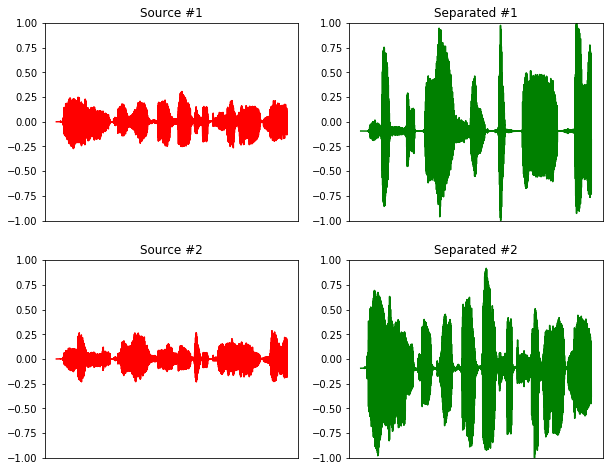

In [149]:
fig = pyplot.figure( figsize=(10, 8) )
fig.canvas.set_window_title( 'Blind Source Separation' )

ax = fig.add_subplot(221)
ax.set_title('Source #1')
ax.set_ylim([-1, 1])
ax.get_xaxis().set_visible( False )
pyplot.plot( data[:, 0], color='r' )

ax = fig.add_subplot(223)
ax.set_ylim([-1, 1])
ax.set_title('Source #2')
ax.get_xaxis().set_visible( False )
pyplot.plot( data[:, 1], color='r' )

ax = fig.add_subplot(222)
ax.set_ylim([-1, 1])
ax.set_title('Separated #1')
ax.get_xaxis().set_visible( False )
pyplot.plot( separated[:, 0], color='g' )

ax = fig.add_subplot(224)
ax.set_ylim([-1, 1])
ax.set_title('Separated #2')
ax.get_xaxis().set_visible( False )
pyplot.plot( separated[:, 1], color='g' )
pyplot.show()

In [136]:
separated.dtype

dtype('float32')

In [154]:
separated = separated*2**15
data = data*2**15

In [177]:
separated = separated.astype(np.int16)
data = data.astype(np.int16)

In [178]:
scipy.io.wavfile.write('separated_1.wav', audio1[0], separated[:, 0])
scipy.io.wavfile.write('separated_2.wav', audio1[0], separated[:, 1])
scipy.io.wavfile.write('mixed.wav', audio1[0], data)

In [12]:
import simpleaudio as sa


In [60]:
interact(playsongs, audio = widgets.Button(description='Click me',button_style='',disabled=False,tooltip='Click me', icon='check'))

ValueError: Button(description='Click me', icon='check', style=ButtonStyle(), tooltip='Click me') cannot be transformed to a widget

In [ ]:
wave_read = wave.open("mixed.wav", 'rb')


In [179]:
wave_read = wave.open("mixed.wav", 'rb')

In [180]:
wave_obj = sa.WaveObject.from_wave_file(wave_read)
    
play_obj = wave_obj.play()
play_obj.wait_done()

AttributeError: 'Wave_read' object has no attribute 'read'

In [183]:
from playsound import playsound
playsound('mixed.wav')

ModuleNotFoundError: No module named 'AppKit'

In [182]:
!pip3 install AppKit

  Using cached https://files.pythonhosted.org/packages/0b/fd/56ac6898afc5c7f5718026103bd8f0b44714b6f79ac20d7eb8990c9a7eab/PyGObject-3.32.0.tar.gz
  Using cached https://files.pythonhosted.org/packages/a6/54/23d6cf3e8d8f1eb30e0e58f171b6f62b2ea75c024935492373639a1a08e4/pycairo-1.18.0.tar.gz
  Running setup.py bdist_wheel for pygobject ... error
  Complete output from command /Library/Frameworks/Python.framework/Versions/3.6/bin/python3.6 -u -c "import setuptools, tokenize;__file__='/private/var/folders/m1/ql7z5nj53n974f4xb7_879280000gn/T/pip-build-mrygydj3/pygobject/setup.py';f=getattr(tokenize, 'open', open)(__file__);code=f.read().replace('\r\n', '\n');f.close();exec(compile(code, __file__, 'exec'))" bdist_wheel -d /var/folders/m1/ql7z5nj53n974f4xb7_879280000gn/T/tmpskgxj5cypip-wheel- --python-tag cp36:
  running bdist_wheel
  running build
  running build_py
  creating build
  creating build/lib.macosx-10.6-intel-3.6
  creating build/lib.macosx-10.6-intel-3.6/pygtkcompat
  copying pyg

You are using pip version 9.0.3, however version 19.0.3 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [185]:
import os
os.system("start mixed.wav")

32512

In [ ]:
import pyglet
song = pyglet.media.load('mixed.wav')
song.play()
pyglet.app.run()